In [25]:
# 표준 라이브러리
import os
import random

# 데이터 처리 및 분석 라이브러리
import numpy as np
import pandas as pd
import duckdb

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt


# 진행상황 표시 라이브러리
from tqdm import tqdm

# 머신러닝 관련 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# data load

In [2]:
train = duckdb.query("""
    SELECT * 
    FROM '../data/train.csv'
""").to_df()

test = duckdb.query("""
    SELECT * 
    FROM '../data/test.csv'
""").to_df()

train = train.drop(columns='ID')
test = test.drop(columns='ID')

print(train.head())
print(test.head())

    X_01      X_02      X_03      X_04      X_05      X_06      X_07  \
0  0.016  0.242994  0.538536  0.522295  0.374494  0.555348  0.639091   
1  0.019  0.240380  0.517223  0.538976  0.371149  0.693825  0.663667   
2  0.012  0.248946  0.547109  0.466713  0.415830  0.656887  0.681782   
3  0.013  0.245877  0.527870  0.515534  0.379199  0.594391  0.663816   
4  0.024  0.239237  0.566087  0.514384  0.378451  0.610543  0.644811   

       X_08      X_09      X_10  ...      X_44      X_45      X_46      X_47  \
0  0.494800  0.584233  0.595353  ...  0.435885  0.555359  0.751714  0.376801   
1  0.530931  0.577200  0.617395  ...  0.479859  0.693855  0.748955  0.356118   
2  0.580773  0.527069  0.337828  ...  0.416115  0.656884  0.750059  0.417200   
3  0.494931  0.581796  0.598036  ...  0.436761  0.594364  0.746297  0.374659   
4  0.508567  0.593614  0.646513  ...  0.422407  0.610526  0.749565  0.372742   

       X_48      X_49      X_50      X_51      X_52  target  
0  0.466993  0.527585  0

In [3]:
train_x = train.drop(columns='target')
train_y = train['target']
test_x = test

In [4]:
print(train_x.describe())
print(train_y.describe())

               X_01          X_02          X_03          X_04          X_05  \
count  21693.000000  21693.000000  21693.000000  21693.000000  21693.000000   
mean       0.017989      0.258061      0.533411      0.510776      0.421508   
std        0.004794      0.064098      0.057962      0.082500      0.168995   
min       -0.003000      0.000000      0.000000      0.000000      0.000000   
25%        0.015000      0.244223      0.510506      0.507370      0.363789   
50%        0.018000      0.247364      0.535398      0.520045      0.378157   
75%        0.021000      0.251002      0.560651      0.533285      0.393900   
max        0.037000      1.000000      1.000000      1.000000      1.000000   

               X_06          X_07          X_08          X_09          X_10  \
count  21693.000000  21693.000000  21693.000000  21693.000000  21693.000000   
mean       0.600059      0.618569      0.534465      0.550514      0.517199   
std        0.082645      0.139561      0.153934    

In [5]:
print(train_x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_01    21693 non-null  float64
 1   X_02    21693 non-null  float64
 2   X_03    21693 non-null  float64
 3   X_04    21693 non-null  float64
 4   X_05    21693 non-null  float64
 5   X_06    21693 non-null  float64
 6   X_07    21693 non-null  float64
 7   X_08    21693 non-null  float64
 8   X_09    21693 non-null  float64
 9   X_10    21693 non-null  float64
 10  X_11    21693 non-null  float64
 11  X_12    21693 non-null  float64
 12  X_13    21693 non-null  float64
 13  X_14    21693 non-null  float64
 14  X_15    21693 non-null  float64
 15  X_16    21693 non-null  float64
 16  X_17    21693 non-null  float64
 17  X_18    21693 non-null  float64
 18  X_19    21693 non-null  float64
 19  X_20    21693 non-null  float64
 20  X_21    21693 non-null  float64
 21  X_22    21693 non-null  float64
 22

# 시각화

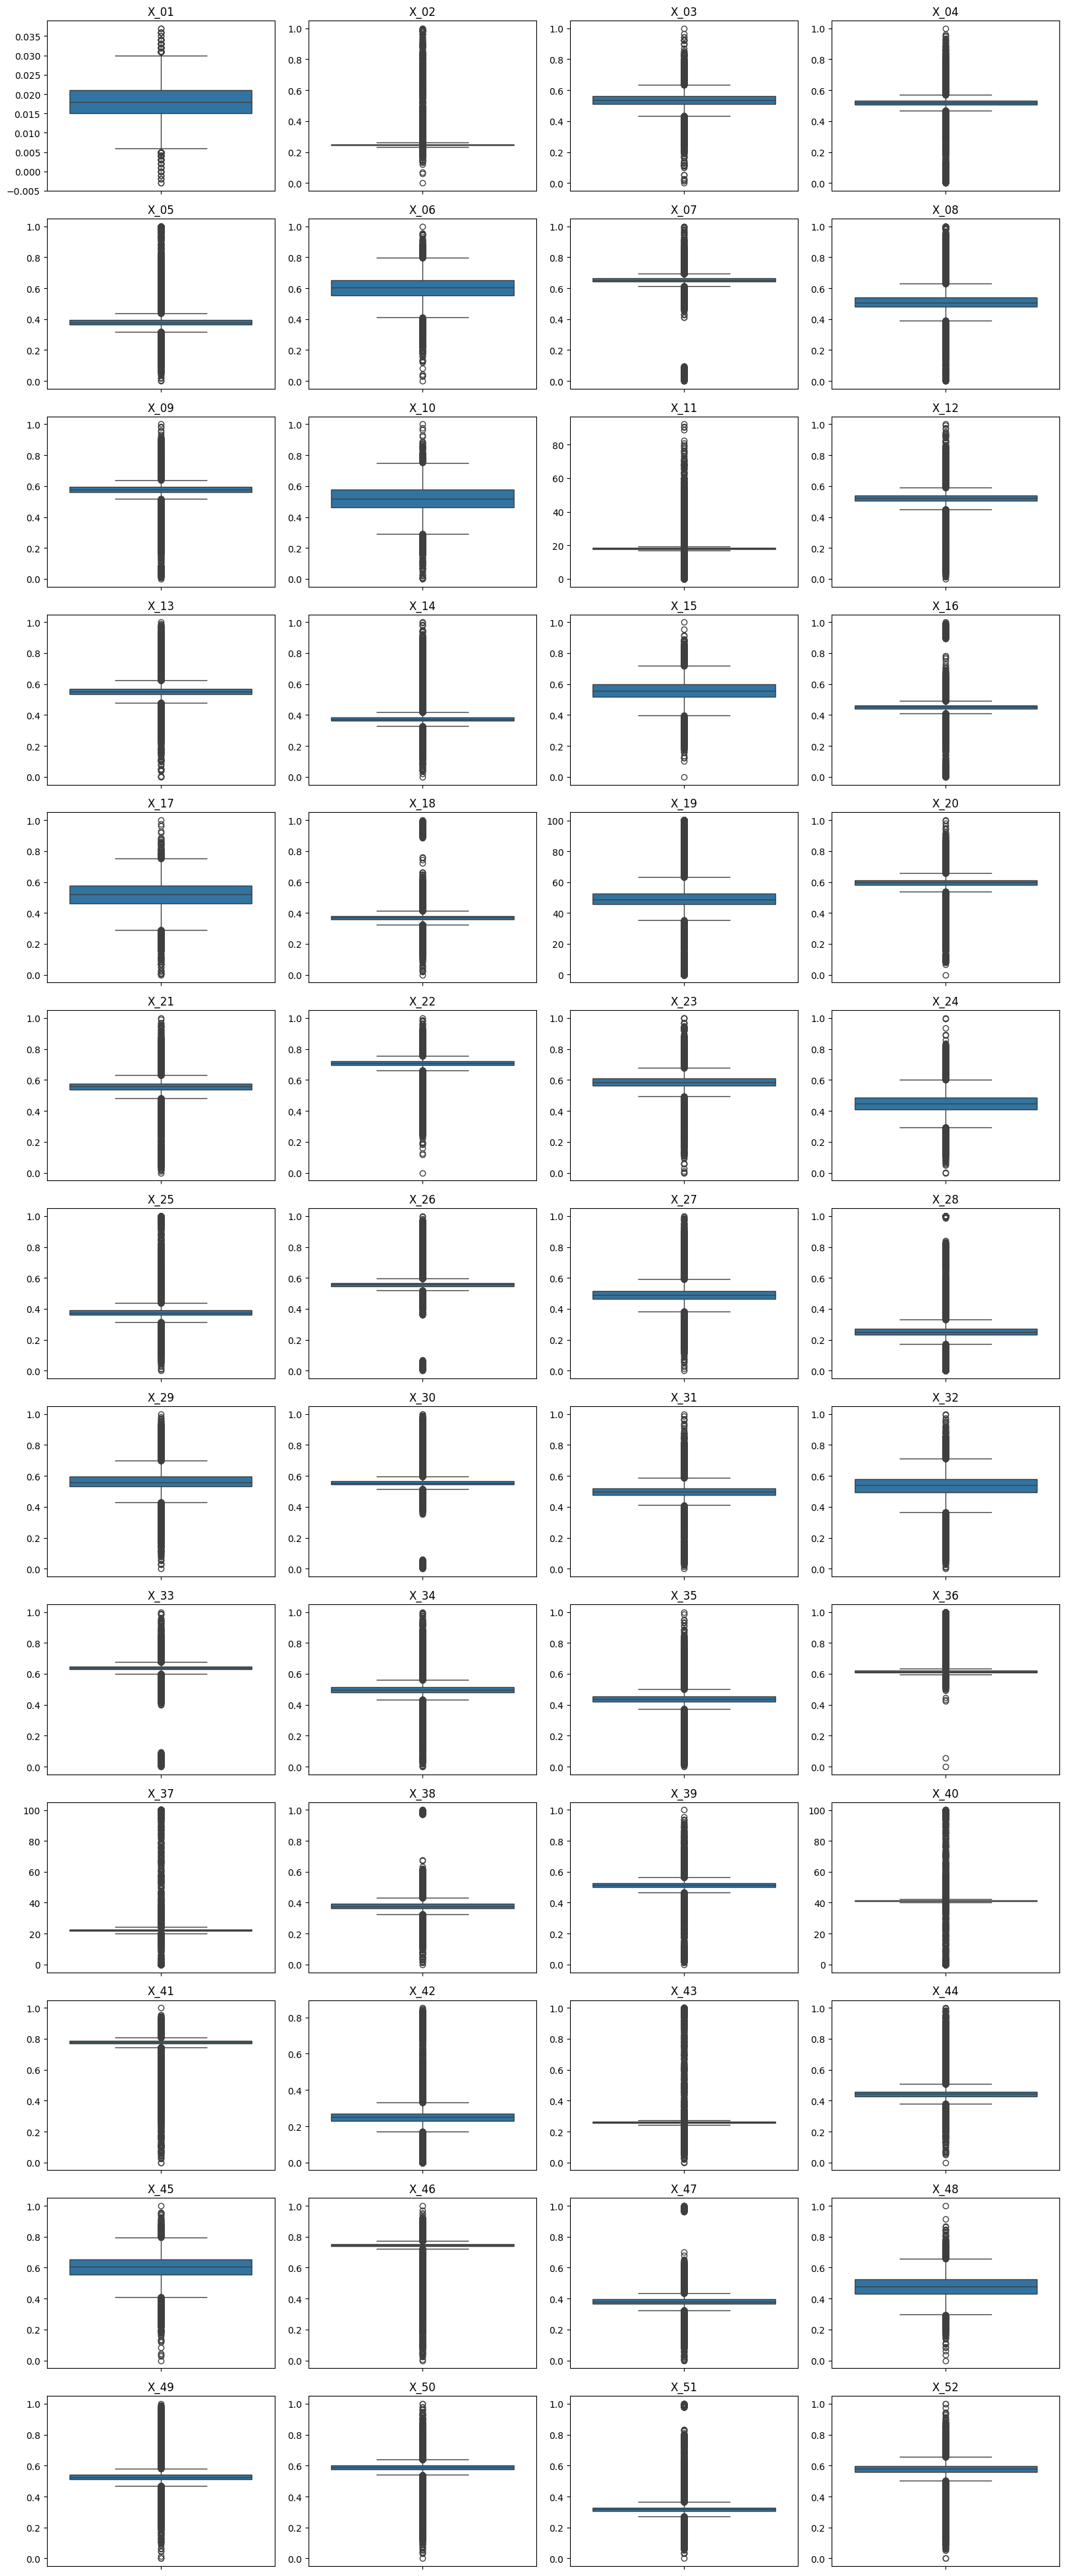

In [6]:
# trian_x 확인

cols = [f'X_{str(i).zfill(2)}' for i in range(1, 53)]
num_cols = 4  # 한 행에 몇 개의 그래프를 그릴지
num_rows = (len(cols) + num_cols - 1) // num_cols  # 필요한 행 수 계산

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*4, num_rows*3))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=train_x, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# 남는 subplot 영역은 삭제 또는 가리기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


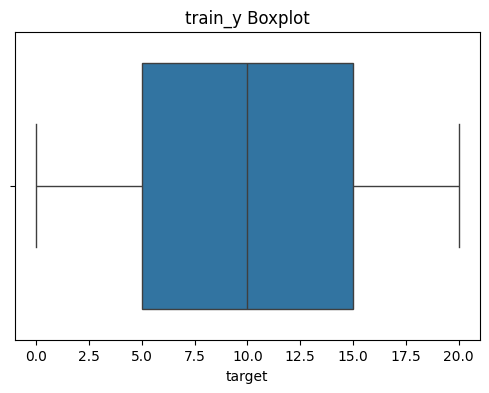

In [7]:
# train_y 확인
plt.figure(figsize=(6, 4))
sns.boxplot(x=train_y)
plt.title('train_y Boxplot')
plt.show()


In [18]:
train_y.value_counts()

target
0     1033
4     1033
17    1033
9     1033
2     1033
10    1033
6     1033
13    1033
11    1033
5     1033
3     1033
20    1033
18    1033
14    1033
12    1033
16    1033
8     1033
15    1033
19    1033
1     1033
7     1033
Name: count, dtype: int64

# 정규화

In [8]:
# 이상치가 겁나 많으니까 ROBUST 정규화를 해 
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# 훈련 데이터: fit과 transform 동시 수행
x_train_scaled = scaler.fit_transform(train_x)

# 테스트 데이터: transform만 수행
x_test_scaled = scaler.transform(test_x)


# 모델링

In [37]:
from lightgbm import LGBMClassifier, early_stopping
from sklearn.metrics import f1_score

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(x_train_scaled, train_y, test_size=0.2, random_state=42)

# 모델 생성
model = LGBMClassifier(
    objective='multiclass',
    num_class=21,
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42
)

# callbacks를 사용한 조기 종료
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(stopping_rounds=10, verbose=False)],
)

# 예측 및 평가
y_pred = model.predict(X_valid)
macro_f1 = f1_score(y_valid, y_pred, average='macro')
print(f'Macro F1 score: {macro_f1:.4f}')


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13043
[LightGBM] [Info] Number of data points in the train set: 17354, number of used features: 52
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Start training from score -3.044984
[LightGBM] [Info] Start training from score -3.069495
[LightGBM] [Info] Start training from score -3.080724
[LightGBM] [Info] Start training from score -3.036545
[LightGBM] [Info] Start training from score -3.049838
[LightGBM] [Info] Start training from score -3.049838
[LightGBM] [In

/Users/oh/workspace/project/smart_shipping_ai_challenge/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Macro F1 score: 0.7993


In [39]:
# 전체 데이터를 이용해 학습 후 예측
# 모델 생성
model = LGBMClassifier(
    objective='multiclass',
    num_class=21,
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42
)

# 모델 학습
model.fit(x_train_scaled, train_y)

# 예측 및 평가
preds = model.predict(x_test_scaled)          # 학습된 모델로 test_x 데이터에 대해 예측 수행

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13044
[LightGBM] [Info] Number of data points in the train set: 21693, number of used features: 52
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start traini

/Users/oh/workspace/project/smart_shipping_ai_challenge/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


# Submission


In [40]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = preds
submission
submission.to_csv('./submit.csv', index=False, encoding='utf-8-sig')